In [1]:
import pandas as pd

/var/folders/4s/_ygj2ww537qg94w4rftspr4w0000gn/T/ipykernel_46612/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("../data/GED/All_train_data.csv")
# train_df = pd.read_csv("../data/GED/train_data.csv")
# test_df = pd.read_csv("../data/GED/test_data.csv")
# val_df = pd.read_csv("../data/GED/val_data.csv")

# 1. Understand and Explore

## 1.1 Basic Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   29998 non-null  object
 1   labels  29998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


In [4]:
df.head()

,input,labels
0,I am reading score of Mahler is Symphony No . .,0
1,I am not interested in cars or electric applia...,1
2,This is my homework for my English class .,0
3,"In comparison , Canada is catches increased an...",0
4,"Fortunately , my older sister is friend is a d...",1


In [5]:
# No null values in dataset
df.isnull().sum()

input     0
labels    0
dtype: int64

In [6]:
# Balanced dataset
df.labels.value_counts()

labels
0    14999
1    14999
Name: count, dtype: int64

# 1.2. Check for duplicate value

In [7]:
# Remove leading and trailing whitespaces
df.input = df.input.apply(str.strip)

In [8]:
df.input.size, df.input.unique().size

(29998, 24422)

In [9]:
# Check duplicate values and observe
duplicate_df = df[df.input.duplicated()]
duplicate_df # also check thorugh "variables" option in notrbook in vs code

,input,labels
259,,1
399,See you .,1
512,,1
621,A house .,1
629,,0
...,...,...
29984,first day,0
29992,I will try harder studying Russian and English...,0
29994,I am sure we all get more sophisticated as we ...,1
29996,It is okay to change the meaning though .,0


In [10]:
duplicate_input_count_df = df.input.value_counts()
duplicate_input_count_df.head(20)

input
                           110
Thank you .                 29
Nice to meet you .          15
Thank you                   13
.                           12
See you .                   12
Nice to meet you !          10
Hello everyone !             9
Thank you for reading .      9
thank you .                  9
Thank you for reading !      9
What do you think ?          9
I do not think so .          7
I am years old .             7
Introduce myself             7
How are you ?                6
Thanks for reading .         6
What should I do ?           6
I want to go again .         6
First Diary                  6
Name: count, dtype: int64

In [11]:
# same input but differnet labels
df.iloc[399,:]

input     See you .
labels            1
Name: 399, dtype: object

In [12]:
df.iloc[5395,:]

input     See you .
labels            0
Name: 5395, dtype: object

In [13]:
# TODO: Should we remove same input with different labels or modify them?

In [14]:
# Duplicate values having different labels
empty_df = df[df.input == ""]
empty_df
# TODO: Should we remove this or not

,input,labels
254,,0
259,,1
512,,1
629,,0
1033,,1
...,...,...
27584,,1
27620,,0
27828,,1
28358,,1


## 1.3. "Lame"tization

In [15]:
import spacy

In [16]:
# !python -m spacy download en_core_web_sm
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [17]:
# Lemmatization with stopwords removal
# TODO: Since lemmatization is taking time, we can store data in a file and load it later
df['lem']=df.input.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [18]:
df.input[50]

'And with their crossed eyes they throw sparks to burn the stupid guys that do not want to study .'

In [19]:
df.lem[50]

'cross eye throw spark burn stupid guy want study .'

In [20]:
df.input.size, df.input.unique().size, df.lem.unique().size

(29998, 24422, 20501)

In [21]:
lem_count_df = df.lem.value_counts()
lem_count_df.head(20)

lem
                   176
.                  164
?                  104
thank .             46
know .              33
!                   27
like .              23
think ?             23
, .                 23
nice meet .         22
thank read .        21
know ?              20
study English .     19
think .             18
tired .             18
year old .          17
thank               17
time .              16
interesting .       15
happy !             15
Name: count, dtype: int64

## 1.4. Document Term Matrix

In [39]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
cv=CountVectorizer(analyzer='word', token_pattern=r'\b\w+\b|\W')
# to consider only alphabetical words remove token_pattern=r'\b\w+\b|\W'

# TODO: Should we consider lemmatized column or input column
data=cv.fit_transform(df.lem)
# pd.DataFrame.sparse.from_spmatrix(data)
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head()

,,!,',",",-,.,?,aback,abandon,abbreviate,...,zombie,zome,zonbi,zone,zoo,zoom,zukkyun,zumba,zzz,zzzzz
0,5,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Word count in dataset
word_cnt_df = df_dtm.isin([1]).sum().to_frame().reset_index()
word_cnt_df.columns = ['word', 'count']
word_cnt_df.head(10)

,word,count
0,,3286
1,!,1491
2,',201
3,",",7478
4,-,996
5,.,22938
6,?,1587
7,aback,2
8,abandon,6
9,abbreviate,1


In [101]:
# count of speical characters
word_cnt_df[~word_cnt_df.word.str.isalpha()]

,word,count
0,,3286
1,!,1491
2,',201
3,",",7478
4,-,996
5,.,22938
6,?,1587
1584,comic_strip,19


## 1.5. Word Cloud

In [102]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from matplotlib import pyplot as plt

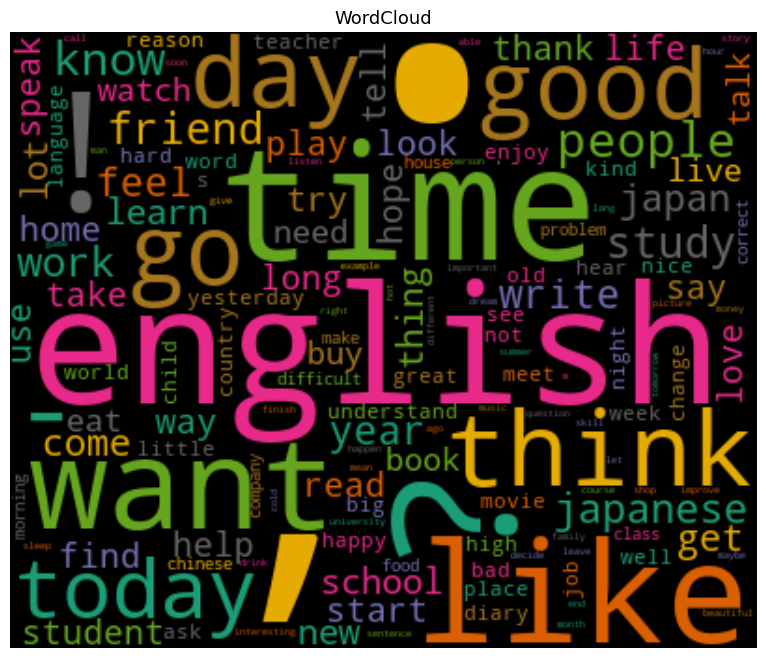

In [115]:
# Function for generating word clouds
word_cnt_dict = word_cnt_df.set_index('word').to_dict()['count']
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(word_cnt_dict)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('\n'.join(wrap("WordCloud",60)),fontsize=13)
plt.show()